# Plotting county level data for the UK

In this post I wanted to give a simple example of plotting country level data. This uses the [ONS data sets on boundaries](https://geoportal.statistics.gov.uk/geoportal/catalog/content/filelist.page?redirect=Docs/Boundaries/County_and_unitary_authorities_(E+W). First let's download the data and pop it in a directory:

In [10]:
%%bash
cd ../data_sets/
wget http://census.edina.ac.uk/ukborders/easy_download/prebuilt/shape/England_ct_2011.zip -O zipdata.zip -q
unzip -o zipdata.zip
rm zipdata.zip

Archive:  zipdata.zip
  inflating: Boundary_Dataset_Guidance_Revised_V2.pdf  
  inflating: Geography_Licensing.pdf  
  inflating: england_ct_2011.dbf     
  inflating: england_ct_2011.prj     
  inflating: england_ct_2011.shp     
  inflating: england_ct_2011.shx     


Check that it is there!

In [13]:
ls ../data_sets/

Boundary_Dataset_Guidance_Revised_V2.pdf      england_ct_2011.shp
easy_download_data.html?data=England_ct_2011  england_ct_2011.shx
england_ct_2011.dbf                           GDP_by_Country_WorldBank/
england_ct_2011.prj                           Geography_Licensing.pdf


Note that only some of these files are needed, but I don't know which so we keep them all. 

Now we get to buisness. First import the normal things in addition to: `shapefile` which is alias of the module `pyshp`.

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import shapefile as sf
import glob

Now we will use the shapefile module to read in the shapes and metadata

In [15]:
shpFilePath = glob.glob("../data_sets/*shp")[0]

map_f = sf.Reader(shpFilePath)
county_metadata = map_f.records()
county_shapes = map_f.shapes()

Each country has a name:

In [16]:
county_metadata[0]

['E10000002', 'Buckinghamshire']

and the shape file has a number of attributes:

In [17]:
dir(county_shapes[0])

['__doc__',
 '__geo_interface__',
 '__init__',
 '__module__',
 'bbox',
 'parts',
 'points',
 'shapeType']

Firstly we could simply plot the points for each country drawing the relevant 
boundries (the idea was stolen from this lovely post)[http://assorted-experience.blogspot.co.uk/2013/10/plotting-state-boundary-data-from.html].

(200000.0, 700000.0, 0.0, 600000.0)

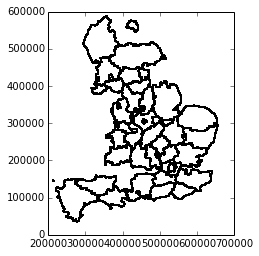

In [18]:
for n in range(len(county_shapes)):
    x = [px[0] if px[0] <0 else px[0]-360 for px in county_shapes[n].points]
    y = [px[1] for px in county_shapes[n].points]
    plt.plot(x, y,'k.',ms=2)

plt.axis('scaled')

But it is better to use polygons since most probably we will want
to color in the counties:

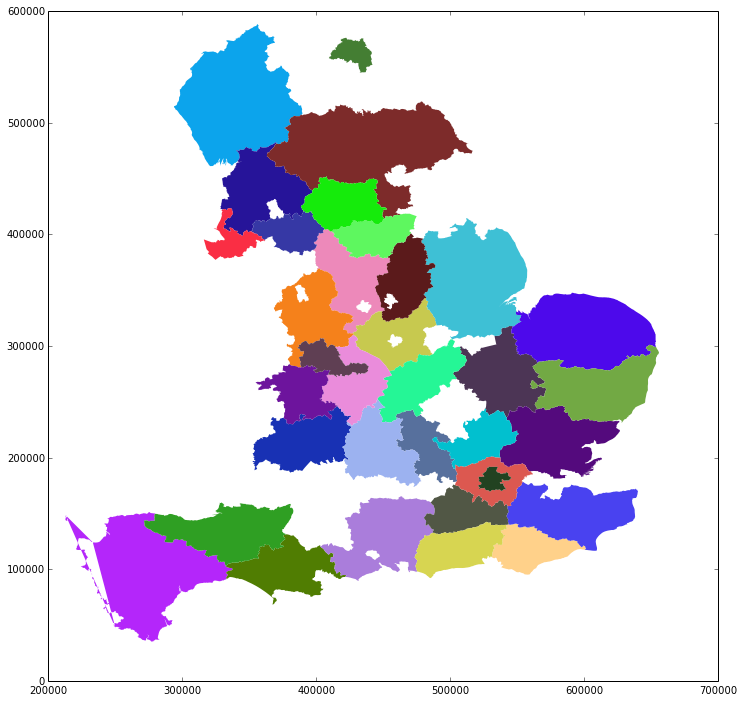

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
for s in county_shapes:
    color = np.random.uniform(0, 1, 3)
    poly = mpl.patches.Polygon(s.points, facecolor=color, edgecolor='none')
    ax.add_patch(poly)
ax.autoscale()
plt.show()